In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys
import math
import pandas as pd
import numpy as np
import pickle
import seaborn as sbn
from pymongo import MongoClient
import matplotlib.pyplot as plt

sys.path.append("src/main/python")

In [4]:
import trainer
import train_tfidf
import train_pmodel
import train_lmodel

In [14]:
# Load our dataset, split the dataset into train and test
# Then save it off into training and test sets

dataset_path = "dataset.csv"
train_path = "train.csv"
test_path = "test.csv"
force_refresh = False

# Roughly 80/20 split
train_size = 300000

df = trainer.load(dataset_path, force_refresh)
shuf = np.random.random_integers(df.shape[0], size=df.shape[0])
print df.shape

train = df.iloc[shuf[:train_size]]
print train.shape
train.to_csv(train_path, encoding='utf-8')

test = df.iloc[shuf[train_size:]]
test = test.loc[pd.notnull(test['airport'])]
print test.shape
test.to_csv(test_path, encoding='utf-8')

[trainer] loading existing data at dataset.csv
(398120, 24)
(300000, 24)
(7353, 24)


[trainer] loading existing data at train.csv
Post BOW Dataset: (22546, 127847), (22546,)

Training {'k': 5, 'weights': 'uniform'}
Found 2352 unique locations


{'f1': 0.0009066594133913595, 'recall': 0.0027199782401740786, 'n_pred': 7353, 'precision': 0.0005439956480348157, 'coverage': 5.0, 'n_truth': 7353}
Saved probability model


Found test set, computing precision, recall
Test shape: ((7353, 127847), (7353,))
Training {'k': 5, 'weights': 'distance'}


[trainer] loading existing data at train.csv
Post BOW Dataset: (22546, 127847), (22546,)


Found 2352 unique locations


{'f1': 0.001813318826782719, 'recall': 0.005439956480348157, 'n_pred': 7353, 'precision': 0.0010879912960696314, 'coverage': 5.0, 'n_truth': 7353}
Saved probability model
                                  cfg        f1  precision   recall
0   {u'k': 5, u'weights': u'uniform'}  0.000907   0.000544  0.00272
1  {u'k': 5, u'weights': u'distance'}  0.001813   0.001088  0.00544



Found test set, computing precision, recall
Test shape: ((7353, 127847), (7353,))


([<matplotlib.axis.XTick at 0x119b5d510>,
 <a list of 2 Text xticklabel objects>)

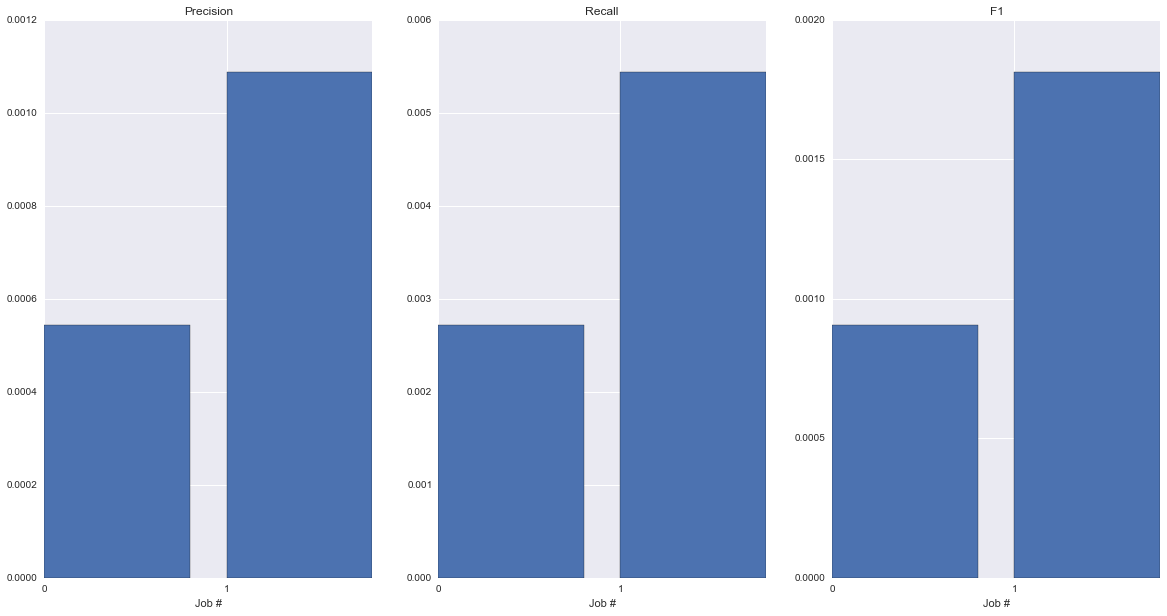

In [32]:
# Load the dataset
import trainer
import train_tfidf
import train_pmodel
import train_lmodel

# Define the extractor function we want to use
# and the recommendation model that we want to train
ex = train_tfidf.post_tfidf
rm = train_pmodel.post_knn
model_template_path = "train_model_%d.pickle"

# Put your configs you want to try here
cfgs = [
    { 'k': 5, 'weights': 'uniform' },
    { 'k': 5, 'weights': 'distance' }
]
res = { 'cfg': [], 'precision': [], 'recall': [], 'f1': [] }

# For each config, train a model
for i,cfg in enumerate(cfgs):
    print >> sys.stderr, "Training %s" % cfg
    tr = trainer.Trainer(ex, rm)
    m, metrics = tr.run(model_template_path % i, train_path, df_test = test, **cfg)
    res['cfg'].append(cfg)
    res['precision'].append(metrics['precision'])
    res['recall'].append(metrics['recall'])
    res['f1'].append(metrics['f1'])
    
res = pd.DataFrame(res)   
print res

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.bar(range(res.shape[0]), res['precision'])
plt.title('Precision')
plt.xlabel('Job #')
plt.xticks(range(res.shape[0]))

plt.subplot(1, 3, 2)
plt.bar(range(res.shape[0]), res['recall'])
plt.title('Recall')
plt.xlabel('Job #')
plt.xticks(range(res.shape[0]))

plt.subplot(1, 3, 3)
plt.bar(range(res.shape[0]), res['f1'])
plt.title('F1')
plt.xlabel('Job #')
plt.xticks(range(res.shape[0]))

plt.show()